<a href="https://colab.research.google.com/github/saipavanpatnapu/spam_detection/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn

**Import Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

**Load And Clean The Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'text']

# Convert labels to numbers: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Show a sample
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


**Split The Dataset**

In [ ]:
X = df['text']         # Input
y = df['label']        # Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Vectorize the Text (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Train Naive Bayes Model**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

nb_preds = nb_model.predict(X_test_vec)

print("🔹Multinomial Naive Bayes Results🔹")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

🔹Multinomial Naive Bayes Results🔹
Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



**Train SVM Model**

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

svm_preds = svm_model.predict(X_test_vec)

print("🔸Support Vector Machine Results🔸")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

🔸Support Vector Machine Results🔸
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**Input and Results**

In [ ]:
def predict_message(text, model):
    vec = vectorizer.transform([text])
    prediction = model.predict(vec)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Trying Naive Bayes
print(predict_message("Congratulations! You've won ₹10,000!", nb_model))

# Trying SVM
print(predict_message("Hey, are we still meeting at 4 PM?", svm_model))

Spam
Not Spam


In [ ]:
pip install matplotlib

**Comparing Models**

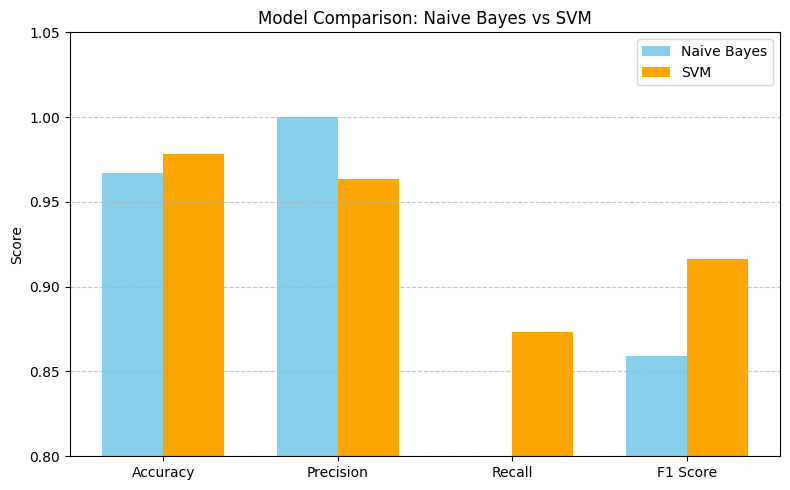

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds)
nb_recall = recall_score(y_test, nb_preds)
nb_f1 = f1_score(y_test, nb_preds)

# Collect metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)

# Labels & values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

x = range(len(metrics))

# Plotting
plt.figure(figsize=(8, 5))
bar_width = 0.35

plt.bar(x, nb_scores, width=bar_width, label='Naive Bayes', color='skyblue')
plt.bar([p + bar_width for p in x], svm_scores, width=bar_width, label='SVM', color='orange')

plt.xticks([p + bar_width/2 for p in x], metrics)
plt.ylabel("Score")
plt.title("Model Comparison: Naive Bayes vs SVM")
plt.ylim(0.8, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
